<a href="https://colab.research.google.com/github/BuxGuerra/TPICD/blob/main/importanciaCaracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeira análise sobre as características

In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Nesse repositório existem dados sobre as temporadas 2010-11 a 2022-23 da NBA.
Cada temporada está em um arquivo separado cujas linhas representam os times e as colunas nos fornecem estatísticas sumarizadas dos times ao longo da temporada regular.

In [43]:
!git clone https://github.com/BuxGuerra/TPICD.git

fatal: destination path 'TPICD' already exists and is not an empty directory.


In [44]:
dfTest = pd.read_csv("/content/TPICD/data/basesSeparadas/2010-11.csv")
dfTest

,Unnamed: 0,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,0,1610612737,Atlanta Hawks,82,44,38,0.537,48.1,36.2,78.4,...,28,12,9,29,28,5,1,29,26,16
1,1,1610612738,Boston Celtics,82,56,26,0.683,48.2,36.9,75.8,...,29,4,22,3,27,10,15,22,23,6
2,2,1610612766,Charlotte Bobcats,82,34,48,0.415,48.3,35.0,77.6,...,24,18,21,28,8,29,8,13,29,24
3,3,1610612741,Chicago Bulls,82,62,20,0.756,48.4,37.1,80.3,...,2,9,17,17,5,26,9,24,20,2
4,4,1610612739,Cleveland Cavaliers,82,19,63,0.232,48.2,35.2,81.1,...,22,20,18,26,28,28,12,10,25,30
5,5,1610612742,Dallas Mavericks,82,57,25,0.695,48.1,37.4,78.8,...,14,2,12,23,24,2,4,23,11,8
6,6,1610612743,Denver Nuggets,82,50,32,0.610,48.1,38.4,80.6,...,11,10,16,13,24,27,18,1,1,7
7,7,1610612765,Detroit Pistons,82,30,52,0.366,48.5,37.3,81.1,...,30,17,2,16,30,15,7,27,22,23
8,8,1610612744,Golden State Warriors,82,36,46,0.439,48.4,39.6,85.9,...,19,7,23,2,12,6,24,30,7,21
9,9,1610612745,Houston Rockets,82,43,39,0.524,48.5,38.7,85.1,...,7,1,8,21,19,22,11,8,3,11


O nosso objetivo aqui é avaliar quais estatísticas foram altas com maior frequência entre os dois times que chegaram à final dos playoffs em cada temporada.

Inicialmente criamos um dicionário para identificar os finalistas de cada temporada e também um outro dicionário que irá guardar a frequência de cada estatística.

In [45]:
#Dicionário para guardar finalistas:
seasonFirstSecond = {'2010-11':('Dallas Mavericks','Miami Heat'),
                     '2011-12':('Miami Heat','Oklahoma City Thunder'),
                     '2012-13':('Miami Heat','San Antonio Spurs'),
                     '2013-14':('San Antonio Spurs','Miami Heat'),
                     '2014-15':('Golden State Warriors','Cleveland Cavaliers'),
                     '2015-16':('Cleveland Cavaliers','Golden State Warriors'),
                     '2016-17':('Golden State Warriors','Miami Heat'),
                     '2017-18':('Dallas Mavericks','Cleveland Cavaliers'),
                     '2018-19':('Toronto Raptors','Golden State Warriors'),
                     '2019-20':('Los Angeles Lakers','Miami Heat'),
                     '2020-21':('Milwaukee Bucks','Phoenix Suns'),
                     '2021-22':('Golden State Warriors','Boston Celtics'),
                     '2022-23':('Denver Nuggets','Miami Heat'),}


#Dicionário para guardar resultado:
importanciaEstatisticas = {'W_RANK': 0, 'L_RANK': 0, 'W_PCT_RANK': 0, 'MIN_RANK': 0, 'FGM_RANK': 0, 'FGA_RANK': 0, 'FG_PCT_RANK': 0, 'FG3M_RANK': 0, 'FG3A_RANK': 0, 'FG3_PCT_RANK': 0, 'FTM_RANK': 0, 'FTA_RANK': 0, 'FT_PCT_RANK': 0, 'OREB_RANK': 0, 'DREB_RANK': 0, 'REB_RANK': 0, 'AST_RANK': 0, 'TOV_RANK': 0, 'STL_RANK': 0, 'BLK_RANK': 0, 'BLKA_RANK': 0, 'PF_RANK': 0, 'PFD_RANK': 0, 'PTS_RANK': 0, 'PLUS_MINUS_RANK': 0}



A contagem da frequência irá funcionar da seguinte forma:

O dataset de cada temporada possui para cada estatística duas colunas, uma é a estatística em si e a outra é um ranking que compara essa estatística dentre todos os times. Caso algum finalista esteja rankeado entre 1° e 4°, nós adicionamos 1 à importância/frequência dessa estatística. No final, o nosso dicionário terá, para cada estatística, um valor que representa a sua "frequência" como alto valor nos times finalistas.

In [46]:
def contarImportancia(importanciaEstatisticas, filePath, finalistas):
  df = pd.read_csv(filePath)

  first = df.loc[df['TEAM_NAME'] == finalistas[0]]
  second = df.loc[df['TEAM_NAME'] == finalistas[1]]

  firstRanks = first.iloc[:,30:]
  secondRanks = second.iloc[:,30:]

  for col in firstRanks.columns:
    if(firstRanks[col].item() <= 4):
      importanciaEstatisticas[col] = importanciaEstatisticas[col] + 1

  for col in secondRanks.columns:
    if(secondRanks[col].item() <= 4):
      importanciaEstatisticas[col] = importanciaEstatisticas[col] + 1


In [47]:
#Aplicando a função em todas as temporadas
directory = '/content/TPICD/data/basesSeparadas'

for fileName in os.listdir(directory):
    if(fileName != '.ipynb_checkpoints'):
      filePath = os.path.join(directory, fileName)
      season = fileName.split('.csv')[0]
      contarImportancia(importanciaEstatisticas, filePath, seasonFirstSecond[season])



In [48]:
#Apenas retirando '_RANK' dos nomes das estatísticas
importanciaEstatisticasAux = {}

for key in importanciaEstatisticas:
  newKey = key.split('_RANK')[0]
  importanciaEstatisticasAux[newKey] = importanciaEstatisticas[key]

importanciaEstatisticas = importanciaEstatisticasAux

In [49]:
importanciaEstatisticas

{'W': 17,
 'L': 17,
 'W_PCT': 17,
 'MIN': 4,
 'FGM': 10,
 'FGA': 3,
 'FG_PCT': 15,
 'FG3M': 9,
 'FG3A': 6,
 'FG3_PCT': 9,
 'FTM': 2,
 'FTA': 3,
 'FT_PCT': 7,
 'OREB': 0,
 'DREB': 11,
 'REB': 2,
 'AST': 9,
 'TOV': 3,
 'STL': 6,
 'BLK': 8,
 'BLKA': 15,
 'PF': 6,
 'PFD': 0,
 'PTS': 7,
 'PLUS_MINUS': 15}

Por fim, nós plotamos nosso resultado:

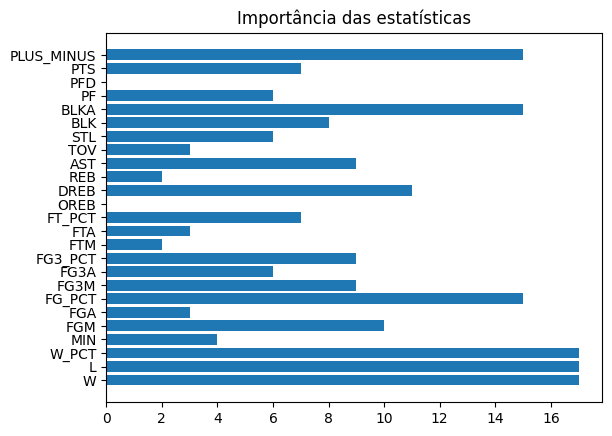

In [50]:
x = list(importanciaEstatisticas.keys())
y = list(importanciaEstatisticas.values())

plt.barh(x, y)
plt.xlabel('')
plt.ylabel('')
plt.title('Importância das estatísticas')

plt.show()

Conseguimos dessa forma perceber algumas características que tem frequentemente altos valores dentre os times finalistas.

Em uma análise posterior, esse resultado não se mostrará muito útil, mas decidimos deixá-lo aqui por ser parte do processo.